In [14]:
%load_ext autoreload
%autoreload 2
from mesh_import import mesh

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import igraph as ig
from CwnGraph import CwnBase, CwnSense, CwnFacet
from tqdm.autonotebook import tqdm

In [37]:
testG = ig.Graph(directed=True)
testG.add_vertices(10)
testG.add_edges([[4,3],[3,2],[2,1],[1,0],[5,1],[6,3],[7,1],[8,7],[9,7],[1,5],[3,6],[7,9]])
for idx in [0,1,2,3,4,7,8]:
    testG.vs[idx]["pwn"] = "pwn"

In [38]:
testG.shortest_paths([0,1,2],[5,6])

[[inf, inf], [1, inf], [2, inf]]

In [39]:
mesh.trim_pwn(testG)

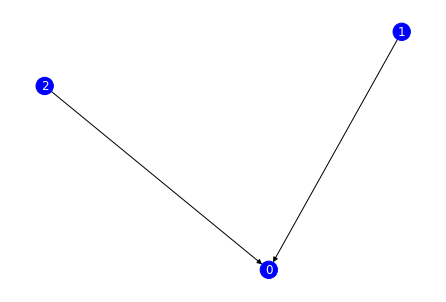

In [40]:
mesh.draw_igraph(testG)

# Graph X Trimming

In [41]:
cns_dir = mesh.get_data_dir() / "cns"
G_x = ig.read(cns_dir / "cwn_sense_graph_x.pkl", format="pickle")

In [42]:
mesh.trim_pwn(G_x)

In [43]:
def summarize_graph(G, compo_distr):    
    print("--------")
    print(G.summary())
    print("|Max component|: %d" % compo_distr[-1][0])
    print("|Max component|/|V|: %.2f" % (compo_distr[-1][0]/len(G.vs)))

--------
IGRAPH UN-- 28827 61249 -- 
+ attr: name (v), pwn (v), pwn (e), rel_type (e)
|Max component|: 4690
|Max component|/|V|: 0.16


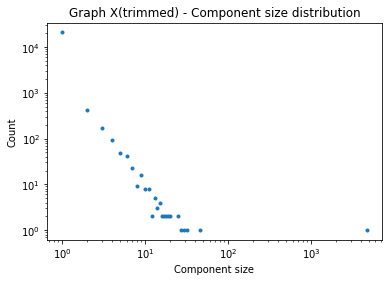

In [44]:
Gx_trim = G_x.copy()
Gx_trim.to_undirected(combine_edges='first')
compo_distr_x = mesh.compo_size_distribution(Gx_trim, title_label="Graph X(trimmed)")
summarize_graph(Gx_trim, compo_distr_x)

In [45]:
Gx_trim.write(cns_dir / "cwn_sense_graph_x_trim.pkl", format="pickle")

## Graph X trimmed structure

In [35]:
import numpy as np
from CwnGraph import CwnBase, CwnSense
from nltk.corpus import wordnet as wn

In [29]:
bet_x = Gx_clone.betweenness()
deg_x = Gx_clone.degree()
cls_x = Gx_clone.closeness()

<ipython-input-29-c8b4f71366aa>:3: RuntimeWarning: closeness centrality is not well-defined for disconnected graphs at c:\projects\python-igraph-jst2e\vendor\build\igraph\igraph-0.9.0-pre+0afacadd-msvc\src\centrality.c:2856
  cls_x = Gx_clone.closeness()


In [31]:
vcompo = mesh.vertex_compo_size(Gx_clone)

In [32]:
import matplotlib.pyplot as plt

In [33]:
jitter = lambda x: np.maximum(np.array(x) + np.random.randn(len(x))/5, 0)

Text(0.5, 0, 'size of component which vertex in')

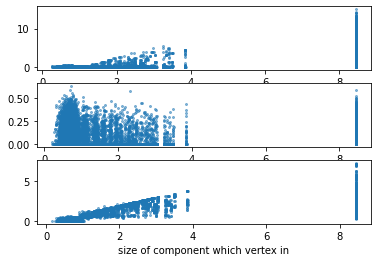

In [43]:
fig, axes = plt.subplots(3,1)
axes[0].scatter(np.log(jitter(vcompo)+1), np.log(jitter(bet_x)+1), s=4, alpha=0.5)
axes[0].set_ylabel('betweenness')
axes[1].scatter(np.log(jitter(vcompo)+1), np.log(jitter(cls_x)+1), s=4, alpha=0.5)
axes[1].set_ylabel('closeness')
axes[2].scatter(np.log(jitter(vcompo)+1), np.log(jitter(deg_x)+1), s=4, alpha=0.5)
axes[2].set_xlabel('')
axes[2].set_xlabel('size of component which vertex in')


## Graph Y trimming

In [25]:
cns_dir = mesh.get_data_dir() / "cns"
G_y = ig.read(cns_dir / "cwn_sense_graph_y.pkl", format="pickle")

In [ ]:
mesh.trim_pwn(G_y)

In [ ]:
Gy_clone = G_y.copy()
Gy_clone.to_undirected(combine_edges='first')
compo_distr_y = mesh.compo_size_distribution(Gy_clone, title_label="Graph Y(trimmed)")
summarize_graph(Gy_clone, compo_distr_y)

In [ ]:
Gy_clone.write(cns_dir / "cwn_sense_graph_y_trim.pkl", format="pickle")

In [7]:
a = [1,2,3]; b = [4,5,6]
from itertools import chain
list(chain(a,b))

[1, 2, 3, 4, 5, 6]